In [1]:
import numpy as np
import copy
import pickle

from scipy import ndimage
from BaselineRemoval import BaselineRemoval
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
from math import *

plt.rcParams['figure.figsize'] = (20.0, 10.0)
# plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['figure.dpi'] = 500
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
file_location = "../data/Raman_Mouse/corrected_4_wavenumbers/"
# file_location = "../data/Green_excitation/corrected_4_wavenumbers/"

filenames = np.load(f"{file_location}FileNames.npy")
with open(f"{'/'.join(file_location.split('/')[:-2])}/Sample_labels.pickle", 'rb') as f:
    labels = pickle.load(f)
labels = {l.split(".")[0]: val for l, val in labels.items()}

wavenumbers = np.load(f"{file_location}Wavenumbers.npy")
    
data = []
for f in filenames:
    x = np.load(f"{file_location}{f.split('.')[0]}.npy")
    data.append(((x.reshape(-1,x.shape[-1])).reshape(x.shape), labels[f.split(".")[0]]))

In [68]:
from sklearn.decomposition import PCA

X = img[0].reshape(-1,img[0].shape[-1])
X2 = fft(X)


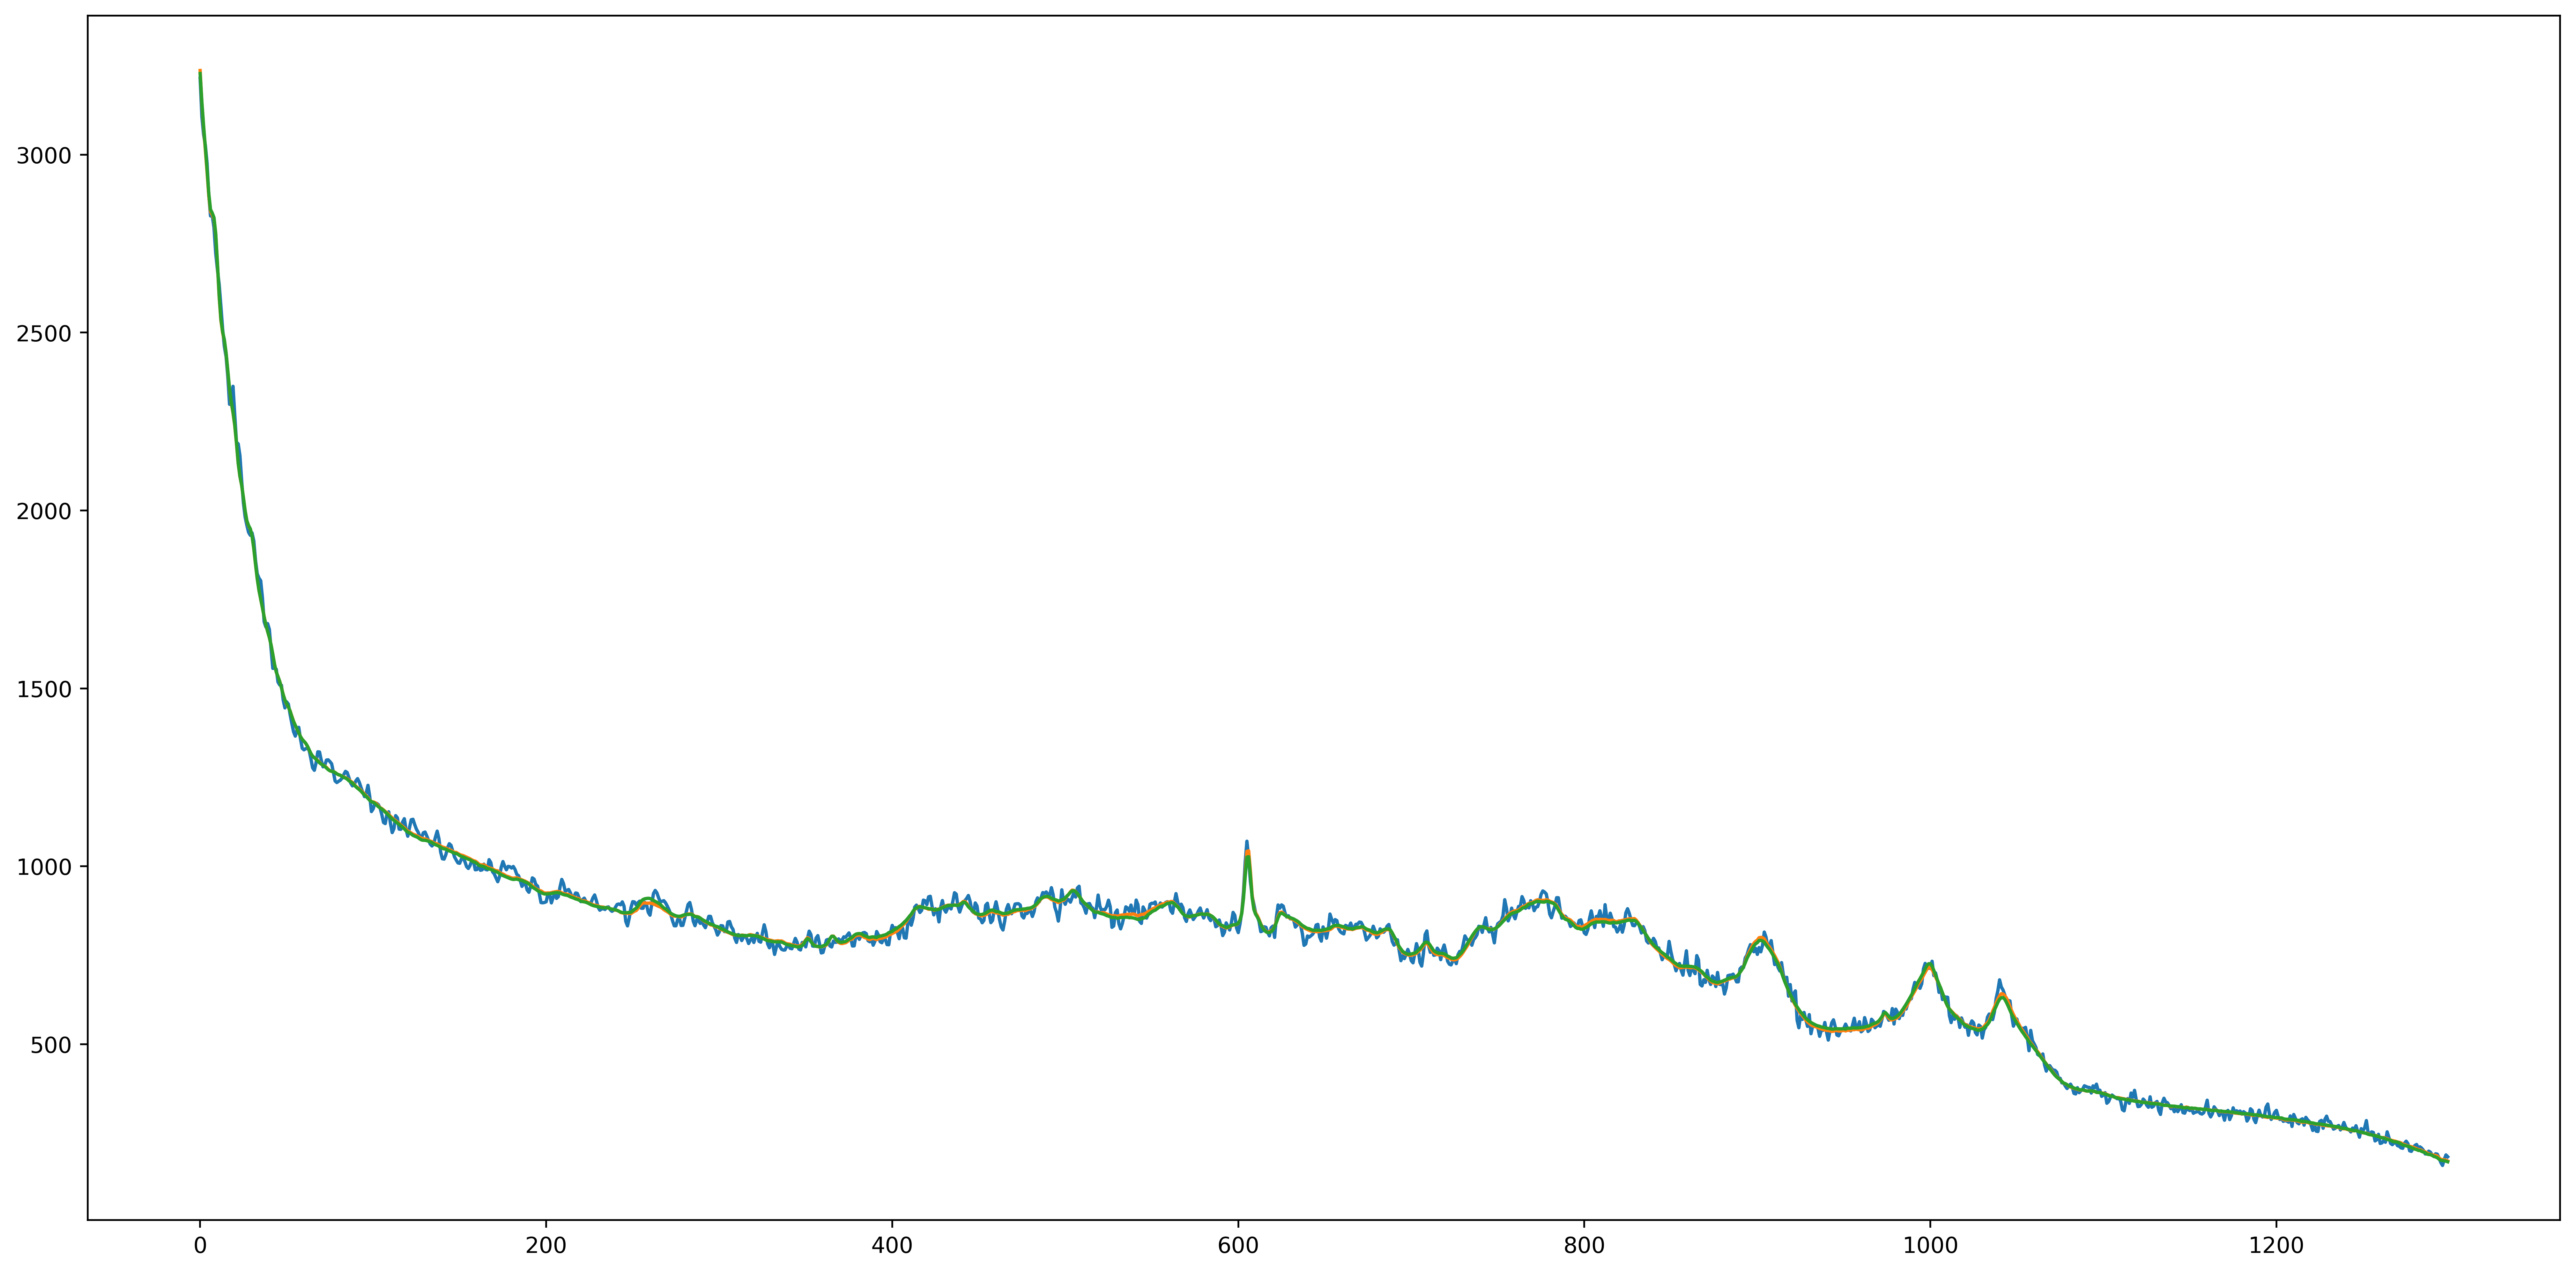

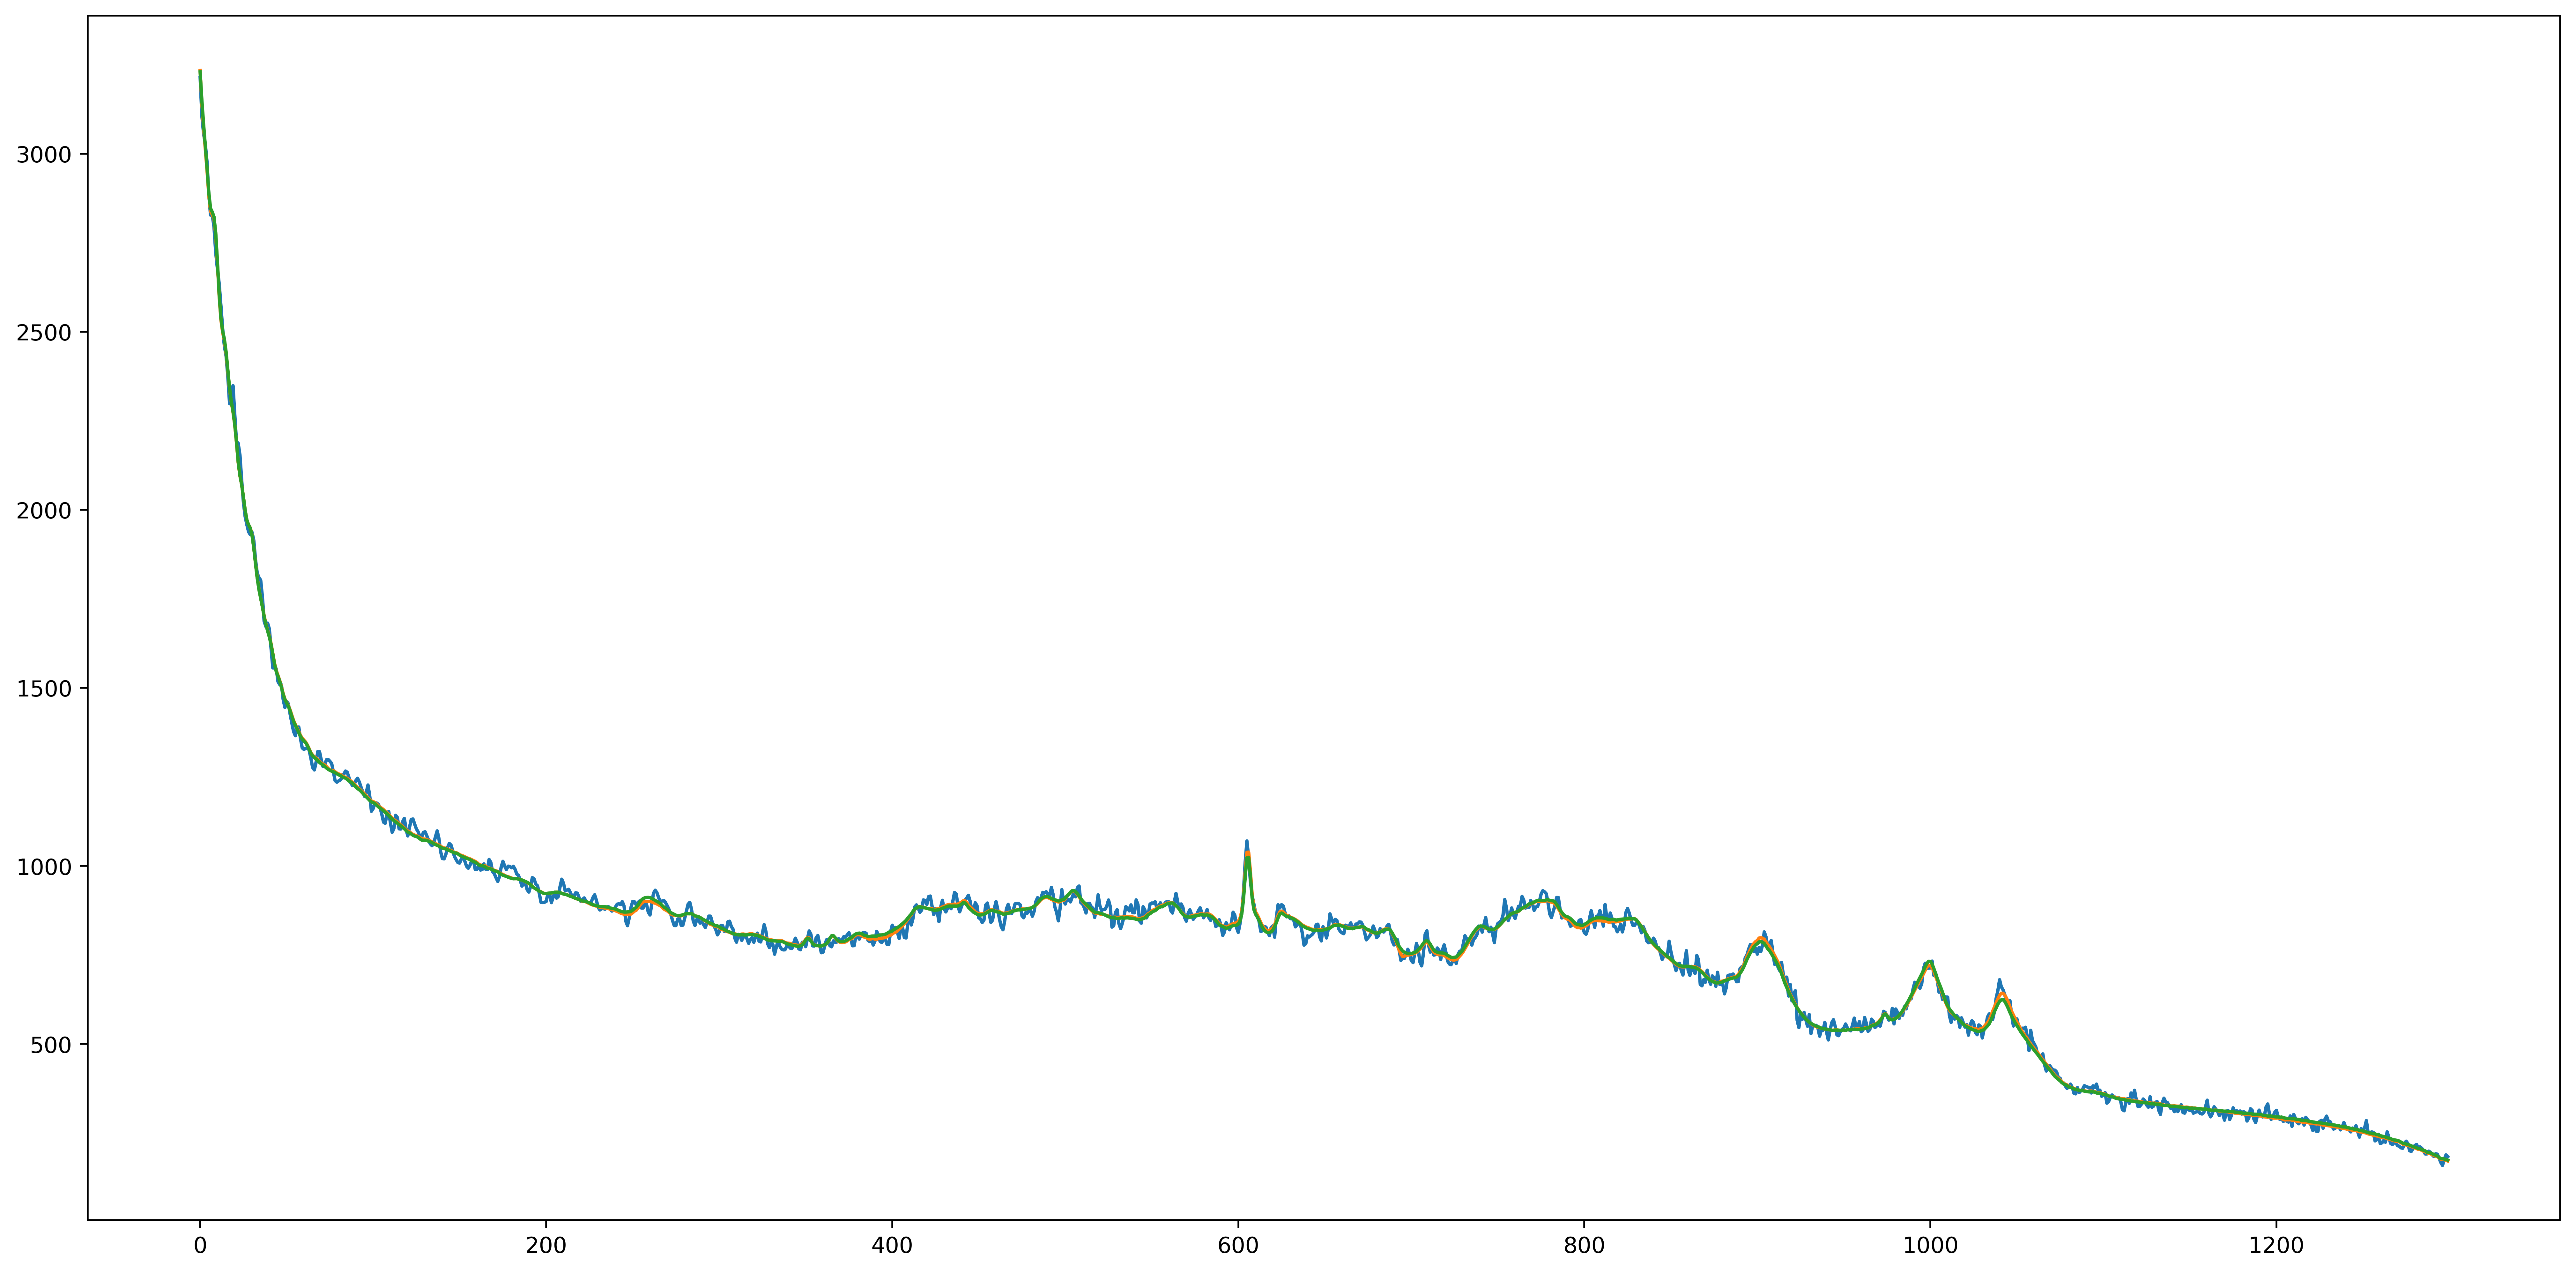

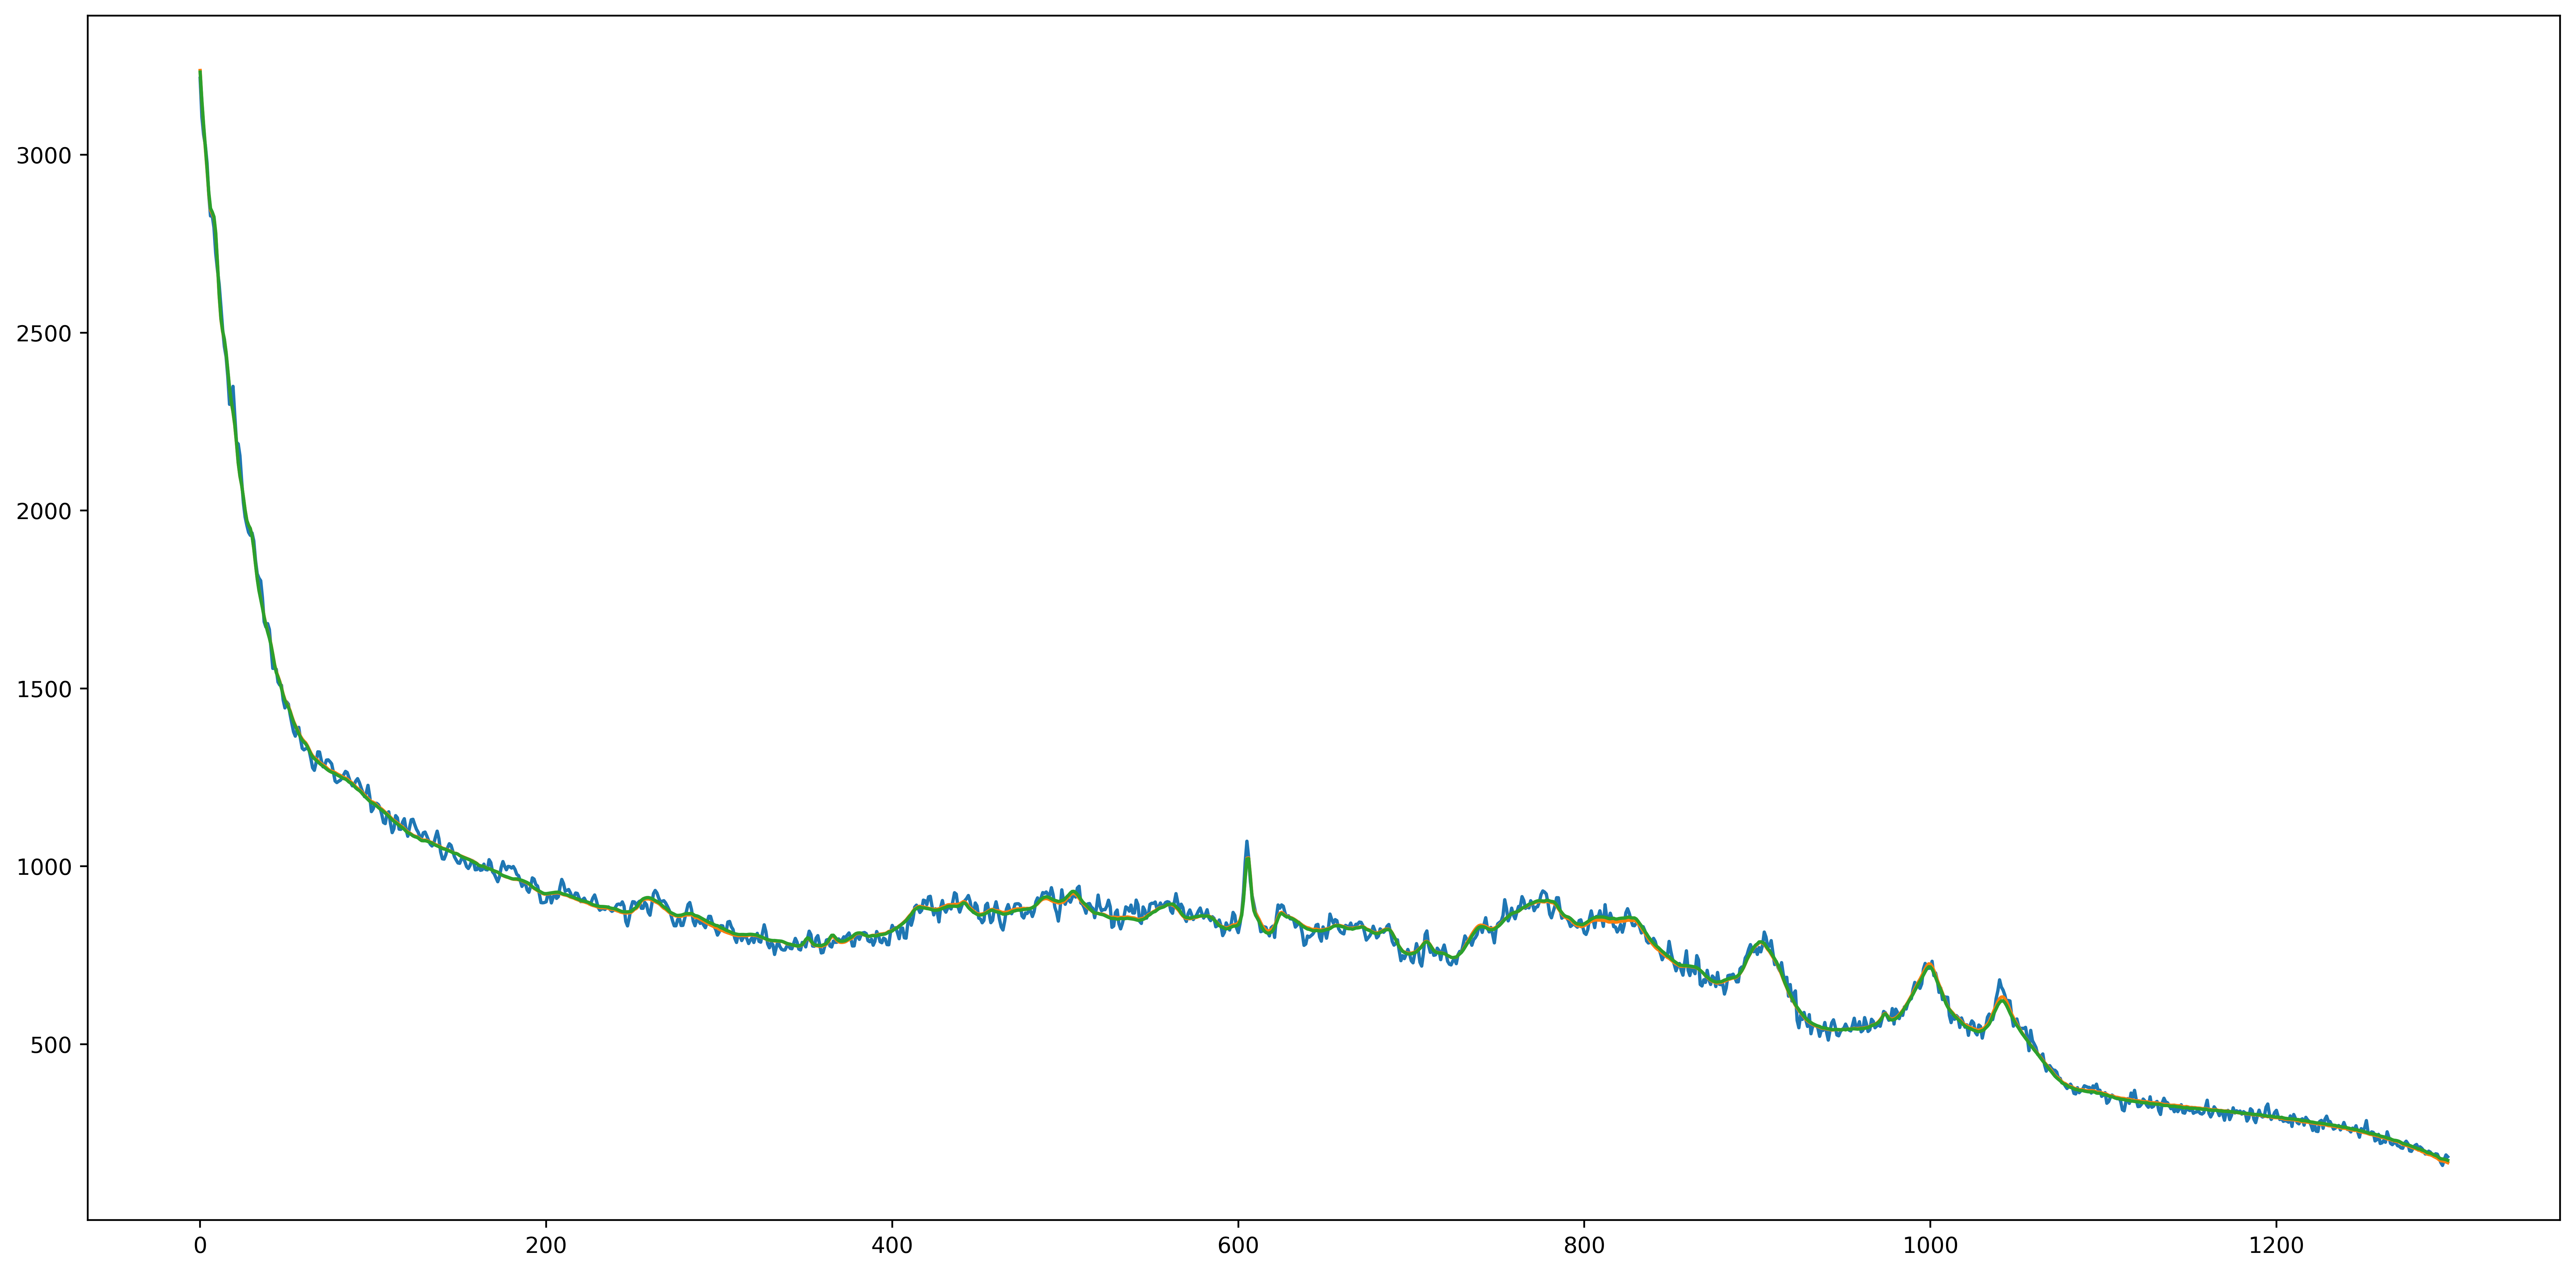

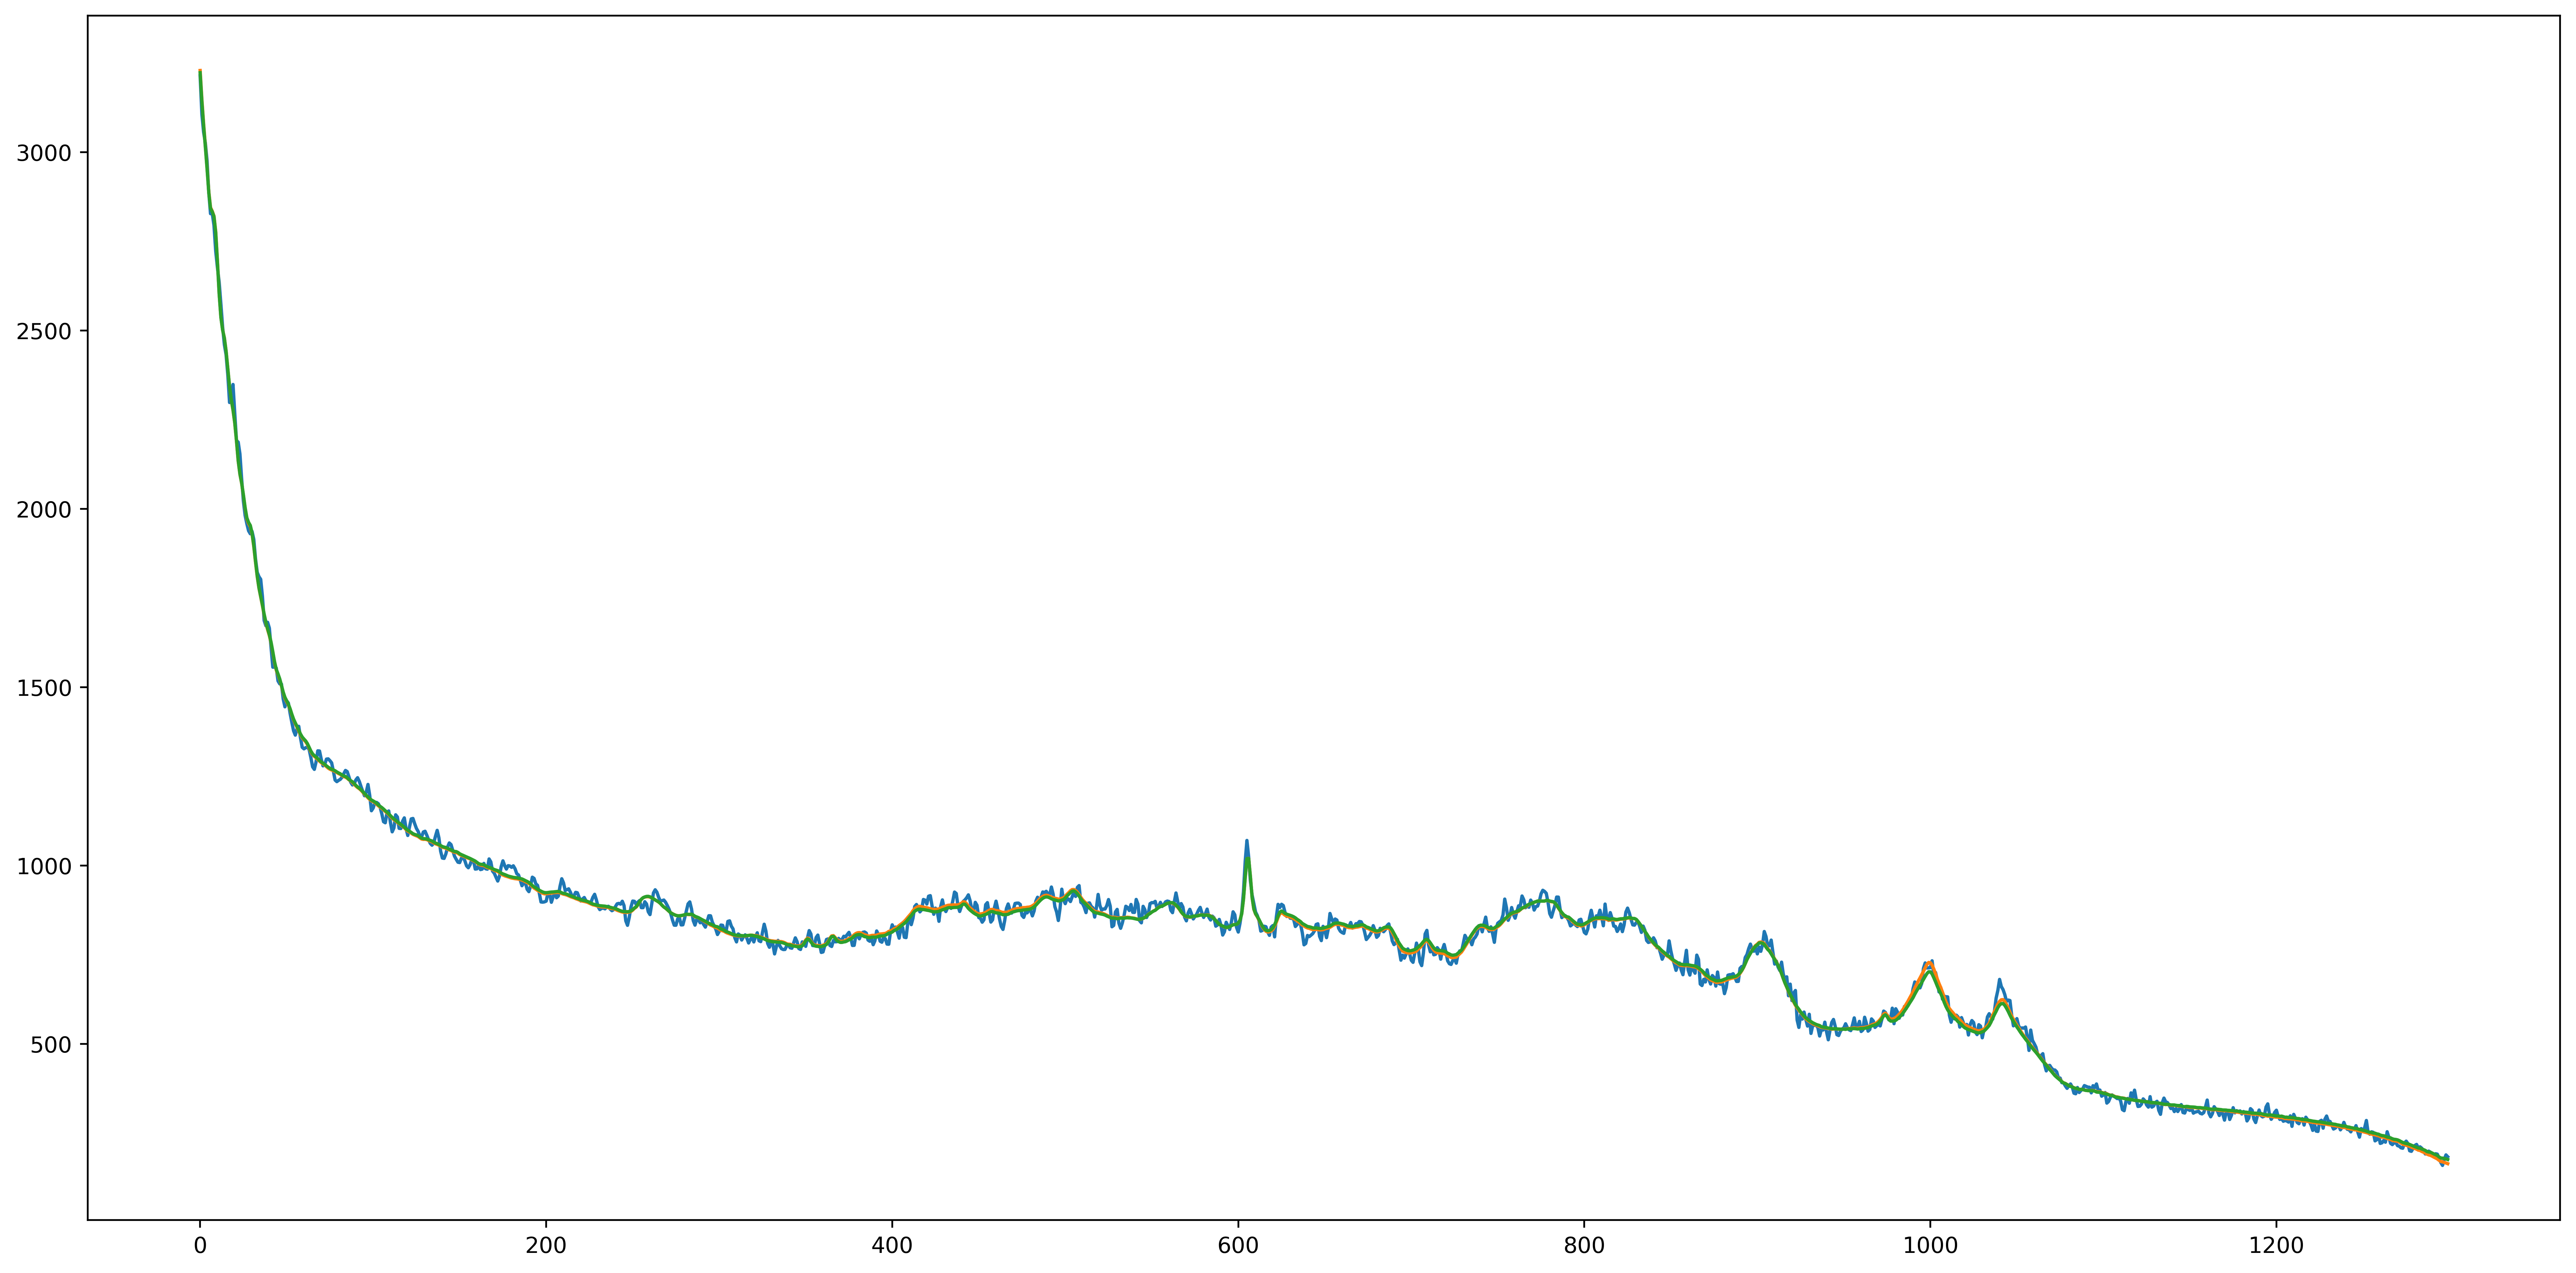

ValueError: x and y must have same first dimension, but have shapes (29,) and (4,)

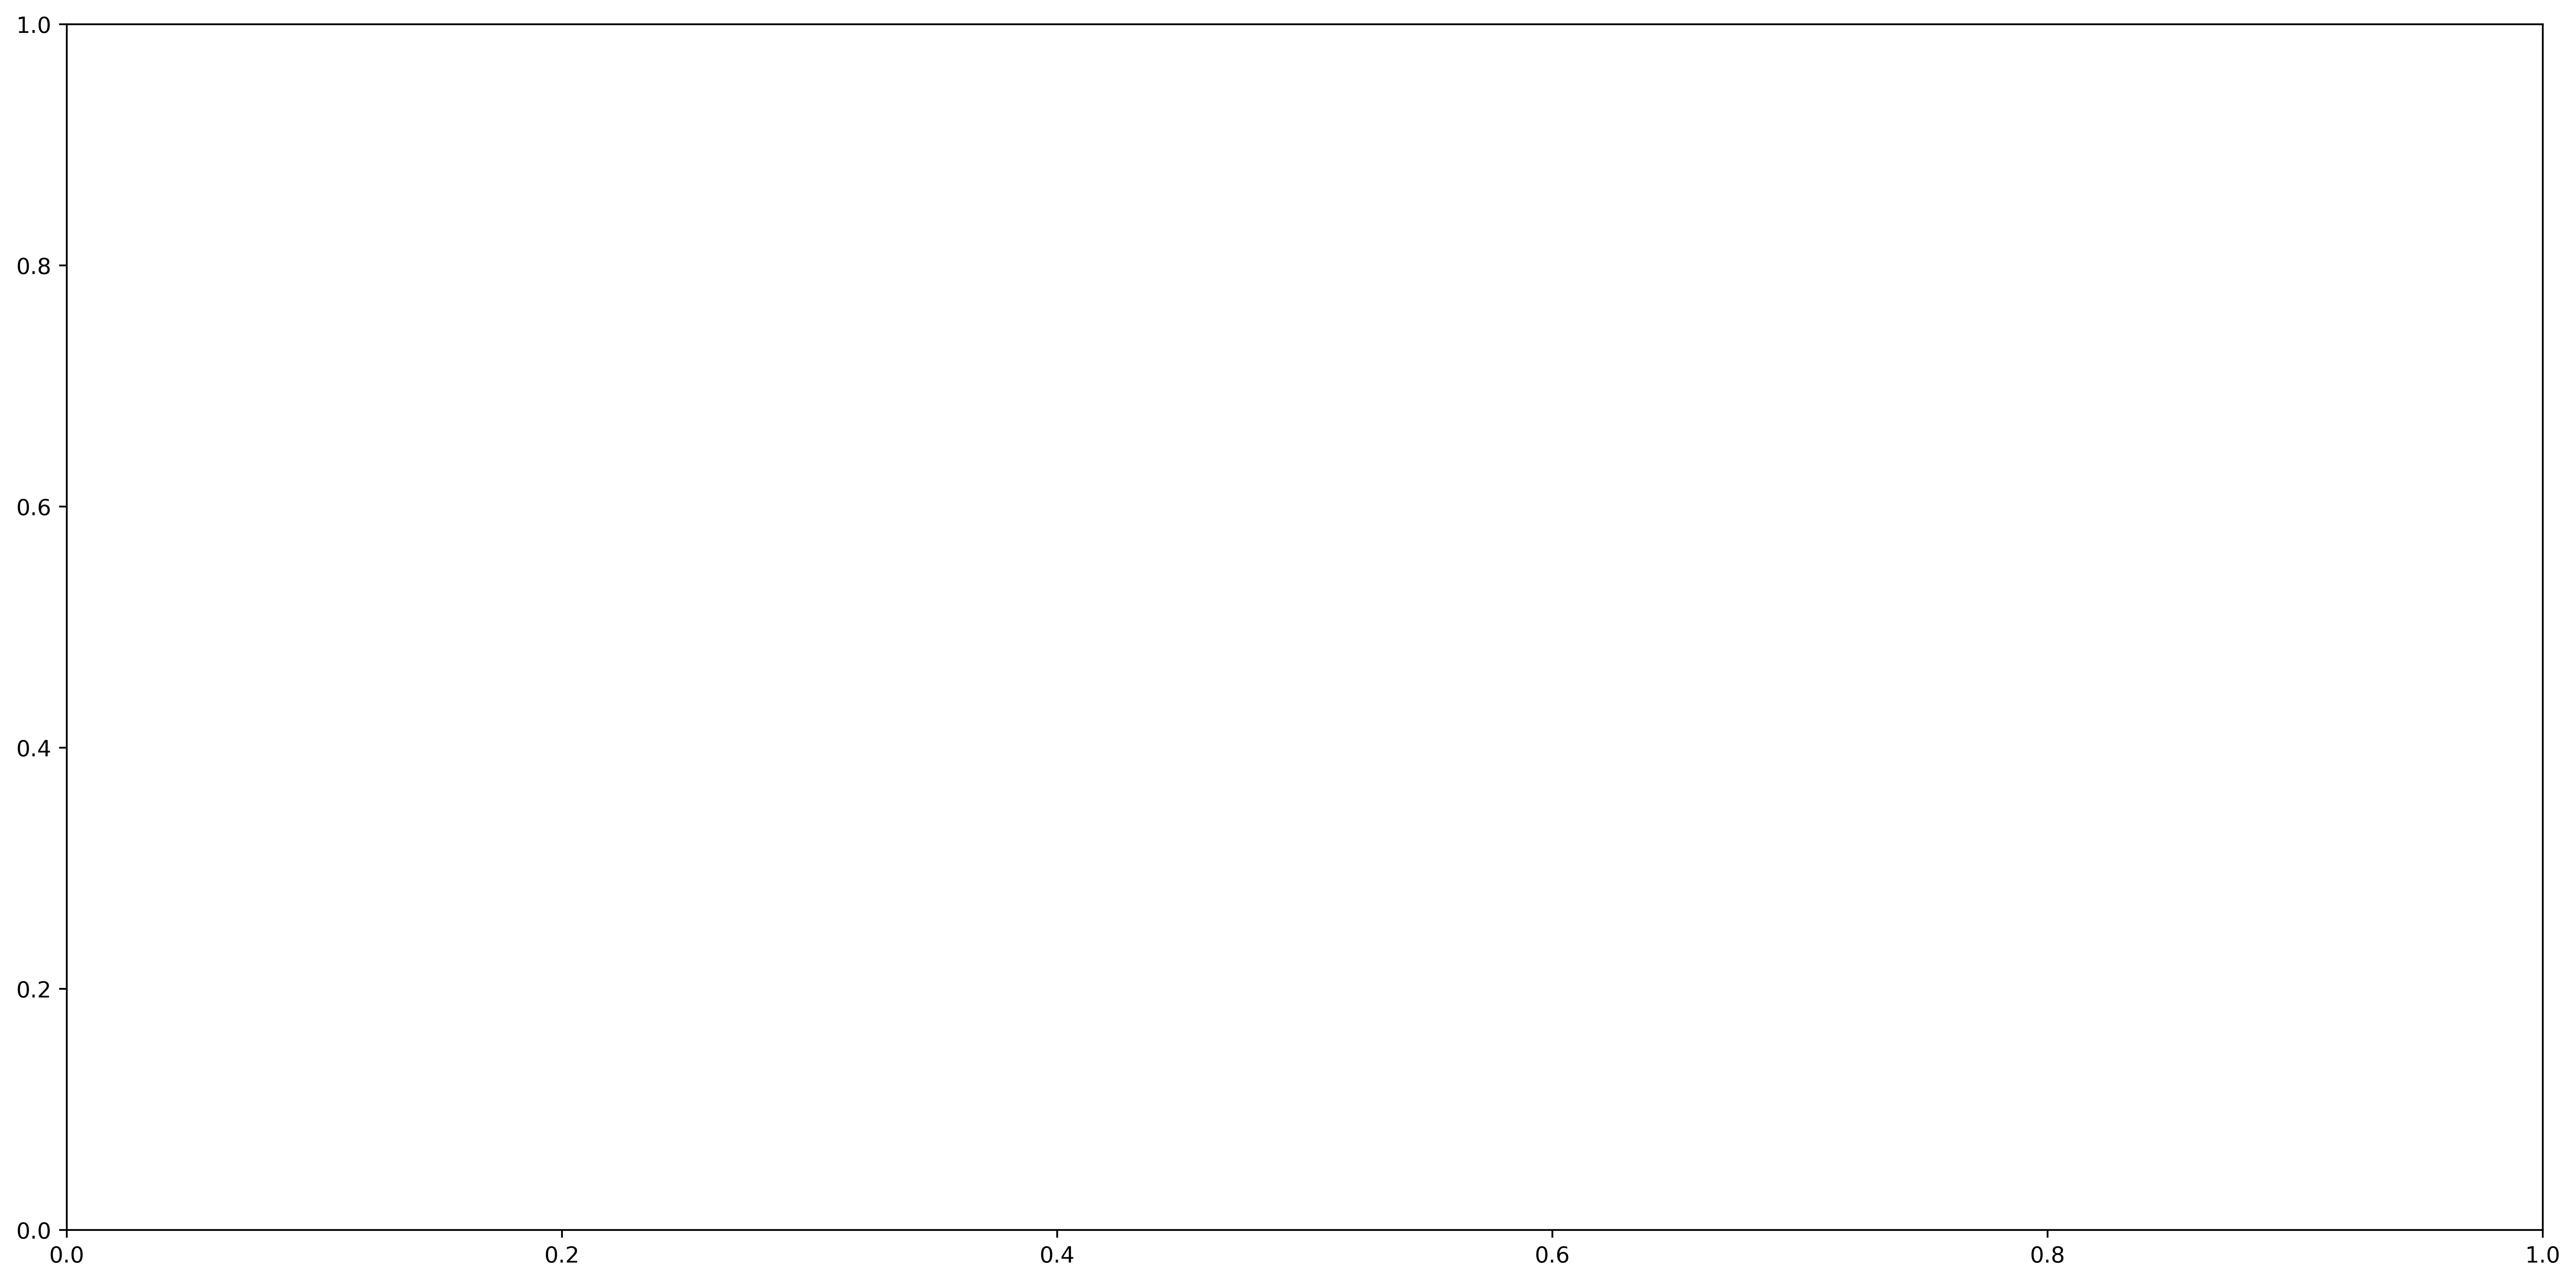

In [104]:
"""
PCA in the Fourier space works better than just PCA
"""


n = np.random.randint(X.shape[0])

error_fourier = []
error_normal = []
dim = np.concatenate((np.arange(1,10), np.logspace(1,3,20))).astype(int)
# for c in dim:
for c in [10,8,7,6]:
    pca = PCA(n_components=c)
    pca.fit(X2.real)
    pca2 = PCA(n_components=c)
    pca2.fit(X2.imag)
    pca3 = PCA(n_components=c)
    pca3.fit(X)
    Y = pca.transform(X2.real)
    Y = pca.inverse_transform(Y)
#     plt.plot(X2[n].real)
#     plt.plot(Y[n])
#     plt.show()
    Y2 = pca2.transform(X2.imag)
    Y2 = pca2.inverse_transform(Y2)
    Y3 = ifft(Y + 1j*Y2)
    Y4 = pca3.transform(X)
    Y4 = pca3.inverse_transform(Y4)
    
    plt.plot(X[n])
    plt.plot(Y3[n].real)
    plt.plot(Y4[n])
    plt.show()
    
    error_fourier.append(np.sum((X - Y3.real)**2))
    error_normal.append(np.sum((X - Y4)**2))
    
plt.plot(dim, error_normal)
plt.plot(dim, error_fourier)
# plt.yscale('log')
plt.axhline(0)
plt.show()
    
    
